In [1]:
import numpy as np
import matplotlib.pyplot as plt

En este código se intentará replicar los resultados de los artículos J. G. OBrien et al, 2018 y X. Lin et al, 2017 para los cuales las velocidades circulares mondianas para Simple y Standard son las siguientes:

$V_{M} = \frac{V_N}{2} \sqrt{1 + \sqrt{1 + \frac{4a_0 R}{V^2_N}}}$  y $V_M = \sqrt{ \sqrt{ \frac{V^4_N}{2} + \sqrt{ \frac{V^8_N}{4} + R^2 a^2_0 V^4_N }} }$ respectivamente.

Para R.A.R. Tomamos la función te interpolación de V.Marra et al, 2020. De donde se obtiene que la velocidad circular mondiana es:

$V_M = \frac{V_N}{\sqrt{ 1 - e^{-\sqrt{ \frac{V^2_N}{Ra_0} }} }}$.

Acá sólo trataremos el perfil de Hernquist.

In [2]:
## Creamos el vector r [1 kpc], desde 0 hasta 10 con paso de 0.1

r = np.arange(0.01,20.1, 0.01)

## Definamos las constantes

M = 1.0 ## 10^10 masas solares. Masa del bulbo de la Vía Láctea

G = 430007.1

a_0 = 4679.4 ## [kpc/Gyr^2]  

b = 2.0 ## escala característica del bulbo

## Definimos la velocidad circular newtoniana de acuerdo al modelo de Hernquist

def V_N(r):
    a_N = (G*M)/((r+b)*(r+b))  ## Aceleración Newtoniana con el perfil de Hernquist
    V_N = np.sqrt(r * a_N)
    return V_N

In [3]:
## Definimos las velocidades circulares mondianas para R.A.R., Simple y Standard

def V_RAR(r):
    V_RAR = V_N(r) / (np.sqrt(1.0 - np.exp(-np.sqrt(V_N(r)*V_N(r) / ( r * a_0 )))))
    return V_RAR

def V_Simple(r):
    V_Simple = (V_N(r) / np.sqrt(2.0)) * np.sqrt(1.0 + 4.0*a_0*r / (V_N(r)*V_N(r)))
    return V_Simple

def V_Standard(r):
    V_N_4 = V_N(r) * V_N(r) * V_N(r) * V_N(r)
    V_Standard_cuadrado = np.sqrt(V_N_4 / 2.0 + np.sqrt(V_N_4*V_N_4/4.0 + r*r*a_0*a_0*V_N_4))
    V_Standard = np.sqrt(V_Standard_cuadrado)
    return V_Standard

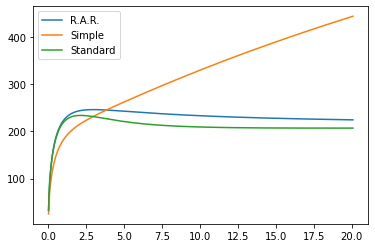

In [4]:
## Graficamos las diferentes formas funcionales

plt.plot(r, V_RAR(r), label='R.A.R.')
plt.plot(r, V_Simple(r), label='Simple')
plt.plot(r, V_Standard(r), label='Standard')
plt.legend()